# First Name: Soe Htet
# Last Name: Naung

# Import Libraries  

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy

# Import Data

In [39]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)
Dengue = pd.read_csv('Dengue.csv', low_memory=False) #increase efficiency
Dengue.head()

,ID,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,sj,1990,18,30/04/1990,0.12,0.10,0.20,0.18,12.42,...,73.37,12.42,14.01,2.63,25.44,6.90,29.40,20.00,16.00,4
1,2,sj,1990,19,7/05/1990,0.17,0.14,0.16,0.16,22.82,...,77.37,22.82,15.37,2.37,26.71,6.37,31.70,22.20,8.60,5
2,3,sj,1990,20,14/05/1990,0.03,0.17,0.16,0.17,34.54,...,82.05,34.54,16.85,2.30,26.71,6.49,32.20,22.80,41.40,4
3,4,sj,1990,21,21/05/1990,0.13,0.25,0.23,0.24,15.36,...,80.34,15.36,16.67,2.43,27.47,6.77,33.30,23.30,4.00,3
4,5,sj,1990,22,28/05/1990,0.20,0.26,0.25,0.25,7.52,...,80.46,7.52,17.21,3.01,28.94,9.37,35.00,23.90,5.80,6


# Data management 

In [40]:
#convert variables to numeric
Dengue['precipitation_amt_mm'] = pd.to_numeric(Dengue['precipitation_amt_mm'],errors='coerce')
Dengue['reanalysis_relative_humidity_percent'] = pd.to_numeric(Dengue['reanalysis_relative_humidity_percent'],errors='coerce')
Dengue['total_cases_c'] = pd.to_numeric(Dengue['total_cases'],errors='coerce')

In [41]:
sub1 = Dengue[['precipitation_amt_mm', 'reanalysis_relative_humidity_percent', 'total_cases']].dropna()
sub1.head()

,precipitation_amt_mm,reanalysis_relative_humidity_percent,total_cases
0,12.42,73.37,4
1,22.82,77.37,5
2,34.54,82.05,4
3,15.36,80.34,3
4,7.52,80.46,6


In [42]:
sub1['precipitation_amt_mm_c'] = (sub1['precipitation_amt_mm'] - sub1['precipitation_amt_mm'].mean())
sub1['reanalysis_relative_humidity_percent_c'] = (sub1['reanalysis_relative_humidity_percent'] - sub1['reanalysis_relative_humidity_percent'].mean())
sub1['total_cases_c'] = (sub1['total_cases'] - sub1['total_cases'].mean())

sub1.head()

,precipitation_amt_mm,reanalysis_relative_humidity_percent,total_cases,precipitation_amt_mm_c,reanalysis_relative_humidity_percent_c,total_cases_c
0,12.42,73.37,4,-32.16,-8.28,-21.58
1,22.82,77.37,5,-21.76,-4.27,-20.58
2,34.54,82.05,4,-10.04,0.41,-21.58
3,15.36,80.34,3,-29.22,-1.30,-22.58
4,7.52,80.46,6,-37.06,-1.18,-19.58



# Scatter plot between each explantory variable and response variable (y=total_cases)

Text(0, 0.5, 'Total Cases')

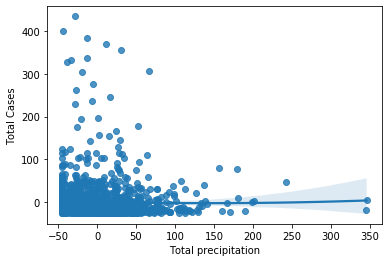

In [57]:
plt.figure()
scat1 = sns.regplot(x="precipitation_amt_mm_c", y="total_cases_c", order=2, data=sub1)
plt.xlabel('Total precipitation')
plt.ylabel('Total Cases')

Text(0, 0.5, 'Total Cases')

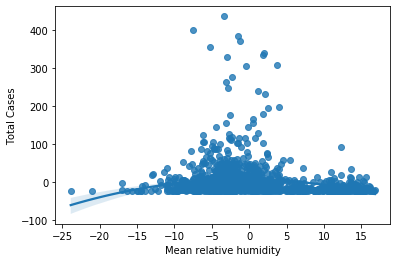

In [58]:
plt.figure()
scat1 = sns.regplot(x="reanalysis_relative_humidity_percent_c", y="total_cases_c", order=2, data=sub1)
plt.xlabel('Mean relative humidity')
plt.ylabel('Total Cases')

# Correlation between each explantory variable and response variable (y=total_cases)

In [55]:
sub2 = sub1.dropna()
print ('association between Total precipitation and total cases')
print (scipy.stats.pearsonr(sub2['precipitation_amt_mm'], sub2['total_cases']))

association between Total precipitation and total cases
(-0.03126323102181133, 0.2480416054969743)


In [56]:
print ('association between Mean relative humidity and total cases')
print (scipy.stats.pearsonr(sub2['reanalysis_relative_humidity_percent'], sub2['total_cases']))

association between Mean relative humidity and total cases
(-0.11201032727264322, 3.315574020772927e-05)


# Regression Analysis

In [51]:
reg1 = smf.ols('total_cases_c ~  I(precipitation_amt_mm_c**2) + reanalysis_relative_humidity_percent_c', data=sub1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:          total_cases_c   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     8.668
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           0.000182
Time:                        00:46:06   Log-Likelihood:                -7124.6
No. Observations:                1367   AIC:                         1.426e+04
Df Residuals:                    1364   BIC:                         1.427e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

# qq plot 

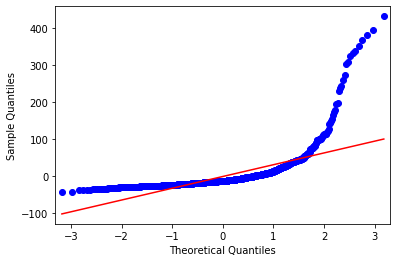

In [61]:
import statsmodels.api as sm
fig1=sm.qqplot(reg1.resid, line='r')

# standardized residual plots

Text(0.5, 0, 'Observation Number')

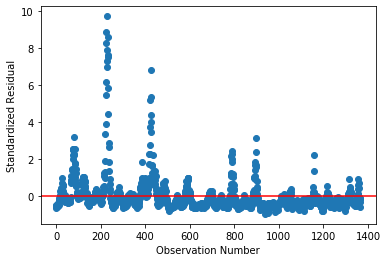

In [53]:
stdres=pd.DataFrame(reg1.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

# percentage of observations over 2 standardized deviation

In [62]:
percentage_over2sd = (np.count_nonzero( stdres[0] > 2) + np.count_nonzero( stdres[0] < -2))/len(stdres)*100
print (percentage_over2sd)

3.2918800292611556


# percentage of observations over 2.5 standardized deviation

In [63]:
percentage_over2_5sd = (np.count_nonzero( stdres[0] > 2.5) + np.count_nonzero( stdres[0] < -2.5))/len(stdres)*100
print (percentage_over2_5sd)

2.3408924652523777
